### Урок 8. Работа с данными

1) Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
2) Загрузите датасет в pandas DataFrame под названием df.
3) Выполните предварительную обработку данных, выполнив следующие шаги:
* a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).
* b. Проверьте и обработайте любые дублирующиеся строки в датасете.
* c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).
4) Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:
* a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?
* b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?
* c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д.
* d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.
5) Выполните проектирование признаков путем реализации следующих преобразований:
* a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.
* b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.
6) Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

загружаем датасет

In [744]:
import pandas as pd
df = pd.read_csv('./train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

датасет представляем собой набор данных различной недвижимости. Состоит из 80 столбцов разных параметров и включает в себя 1460 записей

### Проверка и обработка пустых значений

In [746]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

какое-либо количество отсутствующих значений обнаружено в 19 столбцах: в 4 из них пустых значений больше 75%, в 13 из них меньше 10%

сначала разберемся со столбцами, где пустых значений больше 75%, а именно 'Alley', 'PoolQC', 'Fence', 'MiscFeature' 

In [747]:
# столбец 'Alley' представляет собой данные о типе подъездной дороги к дому
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [748]:
# столбец 'PoolQC' содержит данные о состоянии бассейна
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [749]:
# столбец 'Fence' - тип ограждения
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [750]:
# столбец 'MiscFeature' определяет другие различные особенности не указанные в таблице ранее
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

все пропущенные значения в этих столбцах можно заменить 'N/A'

In [751]:
for el in ['Alley', 'PoolQC', 'Fence', 'MiscFeature' ]:
    df[f'{el}'] = df[f'{el}'].fillna('N/A')

df[['Alley', 'PoolQC', 'Fence', 'MiscFeature']].isna().sum()

Alley          0
PoolQC         0
Fence          0
MiscFeature    0
dtype: int64

дальше обработаем столбец 'LotFrontage' - длина улицы, соединенной с участком (в футах)

In [752]:
print(df['LotFrontage'].isna().sum())
df['LotFrontage'].value_counts()

259


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

как видим столбец представляет собой значения типом int64, большая часть которых составляет 60.0 (143 значения). 259 значений пропущено. Давайте посмотрим статистические значения для этого столбца

In [753]:
df['LotFrontage'].describe()    # видим, что среднее значение равно 70

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [754]:
# пустыезначения буду заполнять средним показателем
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

рассмотрим столбец 'MasVnrType' - тип каменной облицовки - текстовые данные

In [755]:
df['MasVnrType'].value_counts()     # меняем на 'N/A'

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [756]:
df['MasVnrType'] = df['MasVnrType'].fillna('N/A')

столбец 'MasVnrArea' - площадь каменной облицовки - текстовые данные

In [757]:
df['MasVnrArea'].value_counts()     # меняем на наиболее часто втречающееся значение (моду)

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [758]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

столбцы 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' оценивают разные показатели подвала.

In [759]:
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

Раз количество пропусков во всех столбцах одинаковое, предположу, что в этих домах просто отсутствует подвал. Поэтому заполню недостающие значения 'N/A'

In [760]:
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('N/A')


столбец 'Electrical' (тип Элекстичества) имеет одно пропущенное значение, заменим его на чаще встречаемое (т.е. моду)

In [761]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

столбец 'FireplaceQu' (качество камина) содержит в себе строковое представление вида камина. В домах с пустым значением скорее всего камина нет (заполняем 'N/A')

In [762]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('N/A')

следующие столбцы будут оценивать параметры гаража. 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'.

In [763]:
df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isna().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

как и в случае с подвалами, количество пропущенных значений во всех столбцах совпадает, логично предположить, что гаражей в этих домах попросту нет.

In [764]:
df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']] = df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('N/A')


еще раз проверим датасет на пустые значения и убедимся в их отсутствии

In [765]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

### Проверка на дубликаты

In [766]:
duplicates = df.duplicated()
duplicates_df = df[duplicates]
duplicates_df       # дубликаты отсутствуют

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [767]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Разведочный анализ данных (EDA)

Исследуем столбец 'SalePrice' (цена продажи недвижимости). Лучше всего это посмотреть на диаграмме

Text(0, 0.5, 'Количество домов')

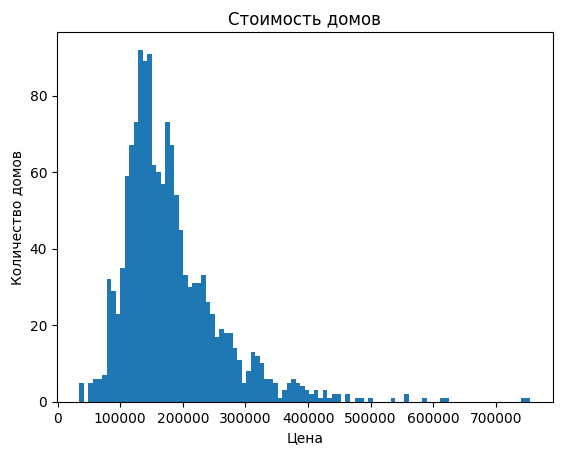

In [768]:
import matplotlib.pyplot as plt

# построим столбчатую диаграмму с кол-вом столбцов 100
plt.hist(df['SalePrice'], bins=100)
plt.title('Стоимость домов')
plt.xlabel('Цена')
plt.ylabel('Количество домов')

визуально видно несколько аномальных значений

In [769]:
import numpy as np
from scipy import stats

# найдем Z-score для нашего столбца
z_score = np.abs(stats.zscore(df['SalePrice']))

# Установка порогового значения Z-score
treshold = 3

# Выявление выбросов на основе Z-score
outliers = df['SalePrice'][z_score > treshold]
len(outliers)



22

получили 22 значения выброса. Попробуем убрать эти выбросы путем логарифмирования, и посмотрим как изменится медиана

In [770]:
median_before = df['SalePrice'].median()
df['SalePrice'] = np.log1p(df['SalePrice'])
median_after = df['SalePrice'].median()

In [771]:
print(f'Медиана до: {median_before}')
print(f'Медиана после: {median_after}')

Медиана до: 163000.0
Медиана после: 12.001511614739405


In [772]:
z_score = np.abs(stats.zscore(df['SalePrice']))
treshold = 3
outliers = df['SalePrice'][z_score > treshold]
outliers

30      10.596660
440     13.226725
495     10.460271
533     10.579005
691     13.534474
803     13.275829
898     13.323929
916     10.471978
968     10.542733
1046    13.229570
1169    13.345509
1182    13.521141
Name: SalePrice, dtype: float64

После обрнаботки логарифмов медиана сильно изменилась, но и число выбросов уменьшилось до 6. Заменим оставшиеся значения выбросов и посмотрим как это выглядит на графике

In [773]:
df.loc[z_score > treshold, 'SalePrice'] = df['SalePrice'].median()

Text(0, 0.5, 'Количество домов')

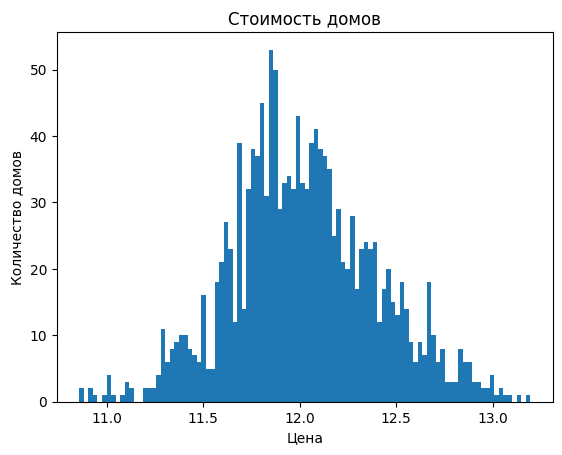

In [774]:
plt.hist(df['SalePrice'], bins=100)
plt.title('Стоимость домов')
plt.xlabel('Цена')
plt.ylabel('Количество домов')

теперь распределение больше напоминает нормальное

Рассмотрим столбец 'OverallQual' (материал и отделка дома)

Text(0, 0.5, 'Количество домов')

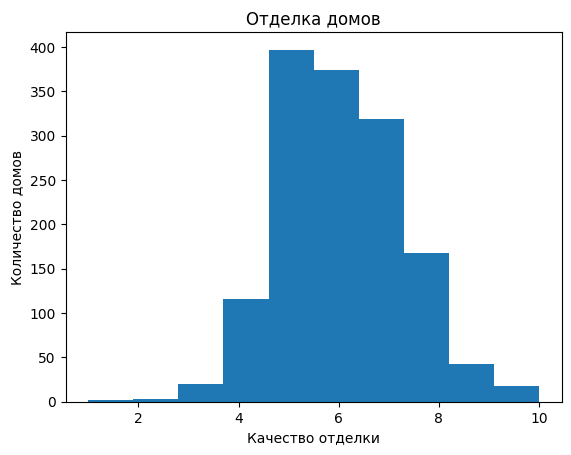

In [775]:
plt.hist(df['OverallQual'], bins=10)
plt.title('Отделка домов')
plt.xlabel('Качество отделки')
plt.ylabel('Количество домов')

In [776]:
df['OverallQual'].median()

6.0

In [777]:
# проверим кол-во выбросов
z_score = np.abs(stats.zscore(df['OverallQual']))
treshold = 3
outliers = df['OverallQual'][z_score > treshold]
outliers

375    1
533    1
Name: OverallQual, dtype: int64

два выброса и оба имеют значение 1. Попробуем удалить их с помощью винсоризации

Text(0, 0.5, 'Количество домов')

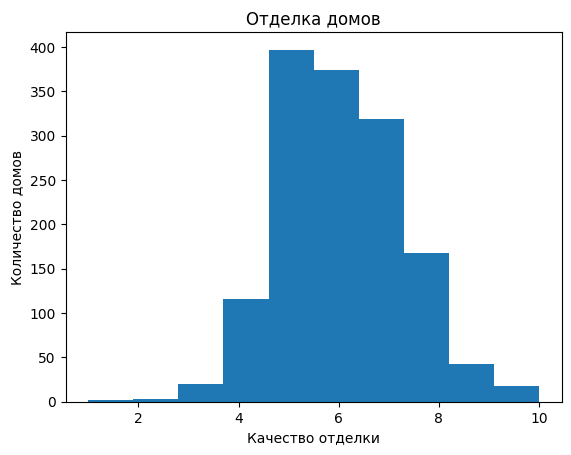

In [778]:
from scipy.stats.mstats import winsorize
plt.hist(winsorize(df['OverallQual'], limits=[0.001, 0.001]), bins=10)
plt.title('Отделка домов')
plt.xlabel('Качество отделки')
plt.ylabel('Количество домов')

Как видим, особо это не помогло, поэтому оставлю так.

Дальше исследуем столбец 'GrLivArea' (жилая площадь над уровнем земли)

Text(0, 0.5, 'Количество домов')

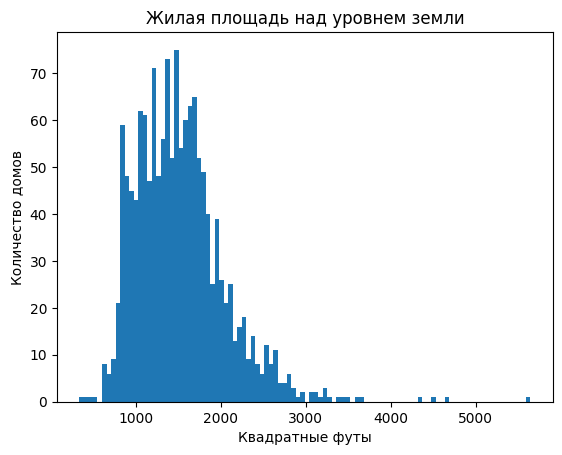

In [779]:
plt.hist(df['GrLivArea'], bins=100)
plt.title('Жилая площадь над уровнем земли')
plt.xlabel('Квадратные футы')
plt.ylabel('Количество домов')

In [780]:
# проверим кол-во выбросов
z_score = np.abs(stats.zscore(df['GrLivArea']))
treshold = 3
outliers = df['GrLivArea'][z_score > treshold]
outliers

118     3222
185     3608
197     3112
304     3493
496     3228
523     4676
608     3194
635     3395
691     4316
769     3279
798     3140
1169    3627
1182    4476
1268    3447
1298    5642
1353    3238
Name: GrLivArea, dtype: int64

In [781]:
# заменим наши выброси медианным значением
df.loc[z_score > treshold, 'SalePrice'] = df['SalePrice'].median()

In [782]:
median_before = df['GrLivArea'].median()
print(f'Медиана до: {median_before}')

# применим функцию логарифма
df['GrLivArea'] = np.log1p(df['GrLivArea'])

median_after = df['GrLivArea'].median()
print(f'Медиана после: {median_after}')

Медиана до: 1464.0
Медиана после: 7.289610521451167


Text(0, 0.5, 'Количество домов')

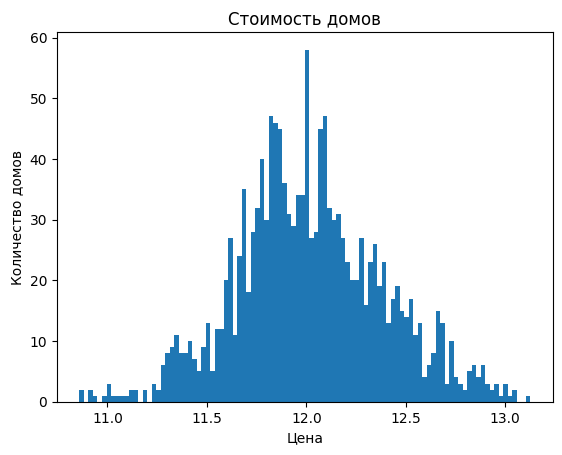

In [783]:
# посмотрим результаты
plt.hist(df['SalePrice'], bins=100)
plt.title('Стоимость домов')
plt.xlabel('Цена')
plt.ylabel('Количество домов')

столбец 'GarageCars' (зармер гаража по вместимости автомобилей)

Text(0, 0.5, 'Количество домов')

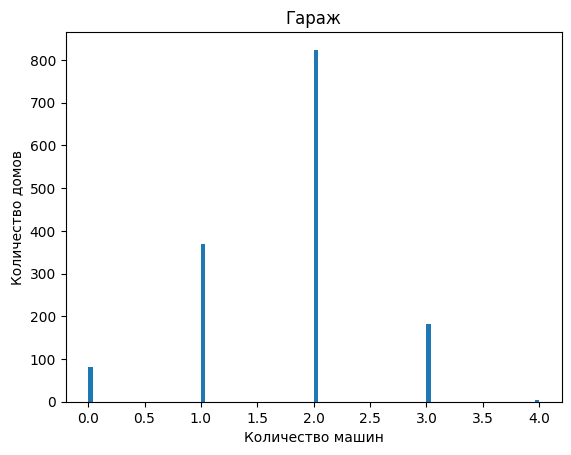

In [784]:
plt.hist(df['GarageCars'], bins=100)
plt.title('Гараж')
plt.xlabel('Количество машин')
plt.ylabel('Количество домов')

In [785]:
z = np.abs(stats.zscore(df['GarageCars']))
threshold = 3
outliers = df['GarageCars'][z > threshold]
outliers

Series([], Name: GarageCars, dtype: int64)

Данные нормальные, выбросов нет

### Визуализируем данные

возьмем интересующие нас данные и посмотрим их зависимости между собой

In [786]:
df_visual = df[['SalePrice', 'OverallQual', 'GrLivArea']]
df_visual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SalePrice    1460 non-null   float64
 1   OverallQual  1460 non-null   int64  
 2   GrLivArea    1460 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 34.3 KB


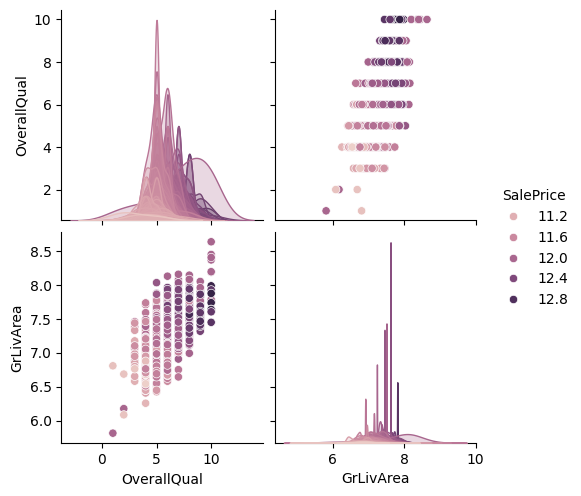

In [787]:
import seaborn as sns
sns.pairplot(df_visual, hue='SalePrice')

По графикам прослеживается линейная зависимость цены недвижимости от площади и материалом отделки

Посмотрим матрицу корреляции и проверим свои догадки

In [788]:
corr_matrix = df_visual.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)<0.3] = 0
corr_matrix

,SalePrice,OverallQual,GrLivArea
SalePrice,1.0,0.8,0.7
OverallQual,0.8,1.0,0.6
GrLivArea,0.7,0.6,1.0


Text(0.5, 1.0, 'График корреляции')

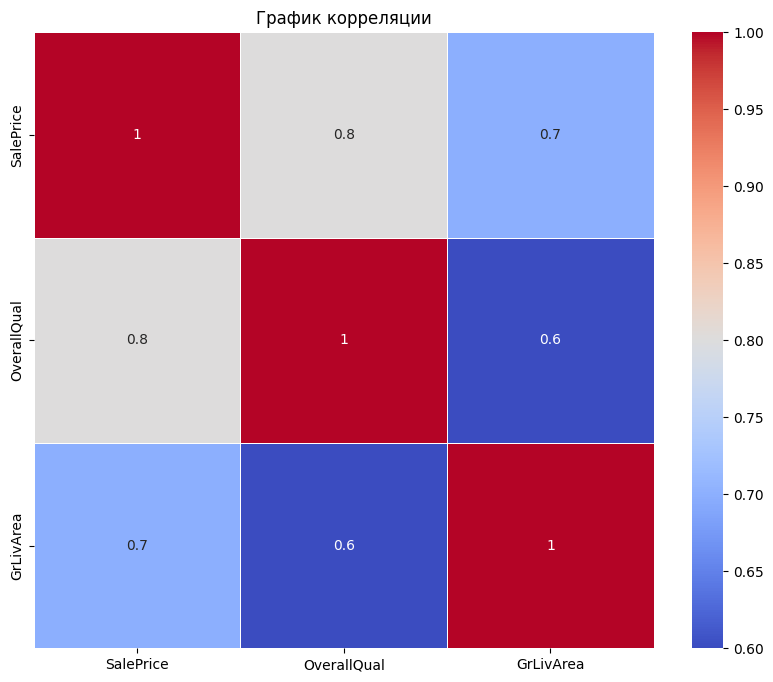

In [789]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('График корреляции')

График показывает, что корреляция между SalePrice и OverallQual составляет 0.8 – это высокая корреляция (качества отделки увеличивается цена дома). Между SalePrice и GrLivArea корреляция равно 0,7 (классифицируется как заметная)

Корреляция бывает: 0.1-0.3 слабая, 0.3-0.5 умеренная, 0.5-0.7 заметная, 0.7-0.9 высокая, 0.9-1.0 весьма высокая.

### Проектирование признаков

Заменим все строковые представления столбцов (тип 'object') на числовые значения. Это пригодится нам для машинного обучения

In [792]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# перебираем все названия столбцов в списке
for name, _ in df.items():
    # проверяем тип столбца
    if df[name].dtype == 'object':
        df[name] = le.fit_transform(df[name].astype(str))

In [793]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [794]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,12.247699
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,12.109016
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,12.317171
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,11.849405
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,12.429220
5,6,50,3,85.0,14115,1,1,0,3,0,...,0,3,2,3,700,10,2009,8,4,11.870607
6,7,20,3,75.0,10084,1,1,3,3,0,...,0,3,4,1,0,8,2007,8,4,12.634606
7,8,60,3,69.0,10382,1,1,0,3,0,...,0,3,4,3,350,11,2009,8,4,12.206078
8,9,50,4,51.0,6120,1,1,3,3,0,...,0,3,4,1,0,4,2008,8,0,11.774528
9,10,190,3,50.0,7420,1,1,3,3,0,...,0,3,4,1,0,1,2008,8,4,11.678448


In [795]:
# делаем запись в csv
df.to_csv('cleaned_house_prices.csv', encoding='utf-8')

В результате работы с датасетом: 
* заполнил недостающие данные в таблице, 
* проверил дубликаты, 
* провел разведочный анализ (в некоторых столбцах убрал выбросы), 
* подготовил датасет для машнного обучения, преобразовав строковые значения в числовые, 
* сохранил датасет в csv-файл